# 3 - Representant grafs amb Datashader


## Instal·lació de Datashader en Google Colab

Ja hem vist que podem instal·lar Datashader amb PIP.

In [ ]:
!pip install datashader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.2 MB/s eta 0:00:00


## Creació de dades sintètiques

Per a aquest exemple, crearem un graf sintèntic. Per fer-ho, cream en un primer moment 10 vèrtexs o ndes, numerats de 0 a 9. Després, generam 20 arestes. Cada aresta serà una filera d'un dataframe, que contendrà dues columnes: *source* (amb el node d'origen de l'aresta) i *target* (amb el node de destí). Emprarem la funció *randint()*, la qual generarà aleatòriament els nombres enters per als nodes origen i destí.

In [ ]:
import pandas as pd
import numpy as np

# Generam primer una llista de 10 nodes
np.random.seed(0)
n=10

nodes = pd.DataFrame(["node"+str(i) for i in range(n)], columns=['name'])
nodes.head()

,name
0,node0
1,node1
2,node2
3,node3
4,node4


In [ ]:
# Cream ara una llista d'arestes (de manera aleatòria)
m = 20
edges = pd.DataFrame(np.random.randint(0,len(nodes), size=(m, 2)),
                     columns=['source', 'target'])
edges.head()

,source,target
0,5,0
1,3,3
2,7,9
3,3,5
4,2,4


In [ ]:
from datashader.layout import random_layout, circular_layout

circular  = circular_layout(nodes, uniform=True)
randomloc = random_layout(nodes)


,name,x,y
5,node5,0.989117,0.960327
6,node6,0.981633,0.967511
7,node7,0.971187,0.630809
8,node8,0.122764,0.103567
9,node9,0.207213,0.694242


## Representam el graf

Per a fer que aquest graf abstracte es pugui traçar, hem de triar una posició x i y per a cada node. Tenim dos algorismes bàsics i ràpids de traçat inclosos en datashader:
*   La primera forma de representar els nodoe del graf és mitjançant una presentació circular, on els nodes es disposen formant un cercle.


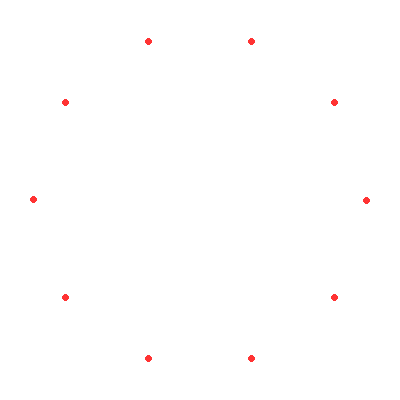

In [ ]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import circular_layout

circular  = circular_layout(nodes, uniform=True)

canvas = ds.Canvas(x_range=[-0.1,1.1], y_range=[-0.1,1.1], plot_height=400, plot_width=400)
agg=canvas.points(circular, 'x', 'y')
tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3)

Dibuixam les arestes.

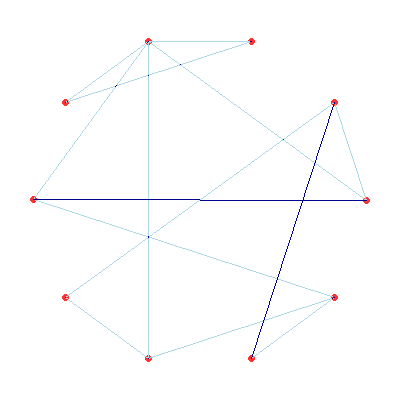

In [ ]:
from datashader.bundling import connect_edges

canvas = ds.Canvas(x_range=[-0.1,1.1], y_range=[-0.1,1.1], plot_height=400, plot_width=400)
agg=canvas.points(circular, 'x', 'y')
node_p = tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3)

edge_p = tf.shade(canvas.line(connect_edges(circular,edges), 'x','y', agg=ds.count()))
tf.stack(node_p, edge_p, how="over")

*   La segona forma és mitjançant l'assignació aleatòria de coordenades x i y a cada node. Cada vegada que l'executem ens donarà una disposició diferent.

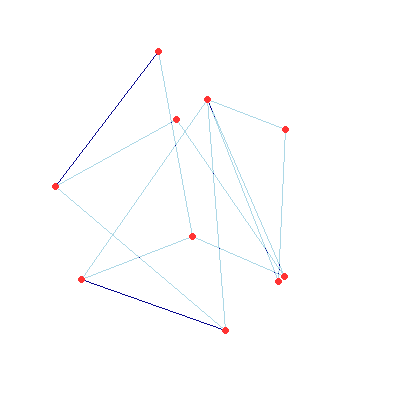

In [ ]:
from datashader.layout import random_layout

randomloc = random_layout(nodes)

canvas = ds.Canvas(x_range=[-0.1,1.1], y_range=[-0.1,1.1], plot_height=400, plot_width=400)
agg=canvas.points(randomloc, 'x', 'y')
node_p = tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3)
edge_p = tf.shade(canvas.line(connect_edges(randomloc,edges), 'x','y', agg=ds.count()))
tf.stack(edge_p, node_p, how="over")

Els dos dissenys anteriors ignoren l'estructura de connectivitat del graf i se centren només en els nodes. L'algorisme ForceAtlas2 és un enfocament més complexe que tracta les connexions com si fossin forces físiques amb la finalitat de generar una disposició basada en la connectivitat.

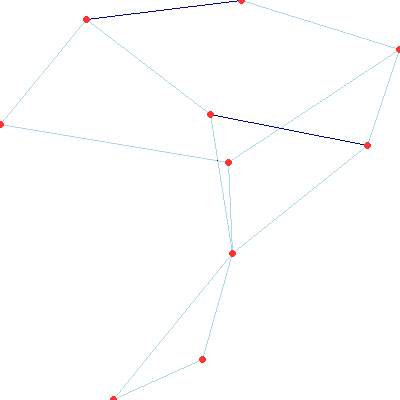

In [ ]:
from datashader.layout import forceatlas2_layout

forcedirected = forceatlas2_layout(nodes, edges)

xr = forcedirected.x.min(), forcedirected.x.max()
yr = forcedirected.y.min(), forcedirected.y.max()

canvas = ds.Canvas(x_range=xr, y_range=yr, plot_height=400, plot_width=400)
agg=canvas.points(forcedirected, 'x', 'y')
node_p = tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3)
edge_p = tf.shade(canvas.line(connect_edges(forcedirected,edges), 'x','y', agg=ds.count()))
tf.stack(edge_p, node_p, how="over")


## Repetim amb molts nodes i arestes
Vegem com augmentat el nombre de nodes (250) i arestes (5.000), el graf segueix podent-se dibuixar de manera eficient.

In [ ]:
np.random.seed(0)
n=250 # Nodos
m = 5000 # Aristas

# Creamos los nodos y aristas
nodes = pd.DataFrame(["node"+str(i) for i in range(n)], columns=['name'])
edges = pd.DataFrame(np.random.randint(0,len(nodes), size=(m, 2)),
                     columns=['source', 'target'])
edges.head()

,source,target
0,172,47
1,117,192
2,67,195
3,103,9
4,211,21


Representació circular:

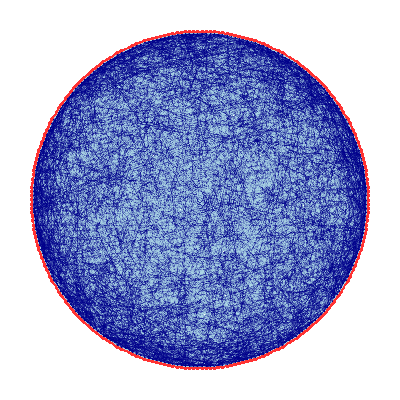

In [ ]:
circular  = circular_layout(nodes, uniform=True)

canvas = ds.Canvas(x_range=[-0.1,1.1], y_range=[-0.1,1.1], plot_height=400, plot_width=400)
agg=canvas.points(circular, 'x', 'y')
node_p = tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3)
edge_p = tf.shade(canvas.line(connect_edges(circular,edges), 'x','y', agg=ds.count()))
tf.stack(node_p, edge_p, how="over")

Representació amb ForceAtlas2:

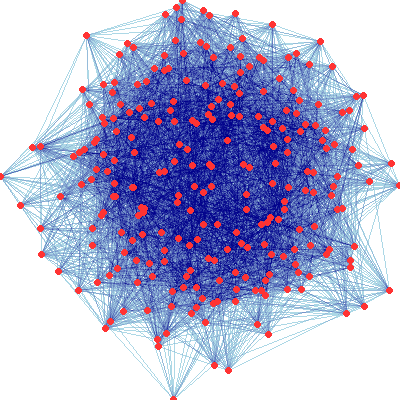

In [ ]:
forcedirected = forceatlas2_layout(nodes, edges)

xr = forcedirected.x.min(), forcedirected.x.max()
yr = forcedirected.y.min(), forcedirected.y.max()

canvas = ds.Canvas(x_range=xr, y_range=yr, plot_height=400, plot_width=400)
agg=canvas.points(forcedirected, 'x', 'y')
node_p = tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3)
edge_p = tf.shade(canvas.line(connect_edges(forcedirected,edges), 'x','y', agg=ds.count()))
tf.stack(edge_p, node_p, how="over")